In [48]:
from sklearn.discriminant_analysis \
import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
import QuadraticDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import matplotlib.patches as mpatches
from matplotlib import colors

data_dir = "D:/vscodepython/Statistical Calculation/Homework4_Regression/"
img_dir = "D:/vscodepython/Statistical Calculation/Homework5_LDA/image_hw5/"
D = np.loadtxt(data_dir + "la_2.txt", comments="%")
#comments:因為txt黨的第一行是以%作為註解行，所以在讀入資料時需要排除

###用來清空所有python儲存的變數
from IPython import get_ipython
#get_ipython().magic("reset -sf")


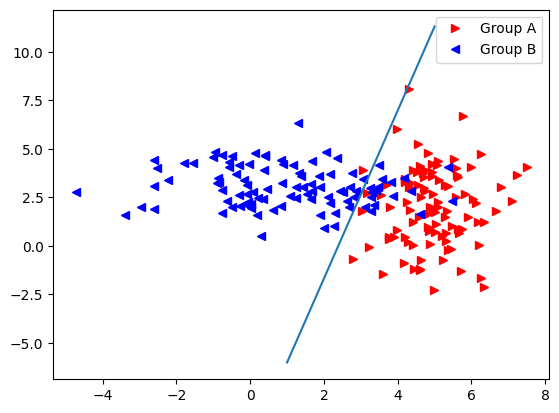

In [22]:
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
plt.plot(C1[:,0], C1[:,1], "r>", label = "Group A")
plt.plot(C2[:,0], C2[:,1],"b<", label = "Group B")
# Estimatr the group parameters
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2

K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2) \
@ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(1, 5, 10)
plt.plot(x, f(x))
#plt.savefig(img_dir+"class.eps", format="eps")
plt.legend()

Training error for LDA = 0.0900
Training error for QDA = 0.0650


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


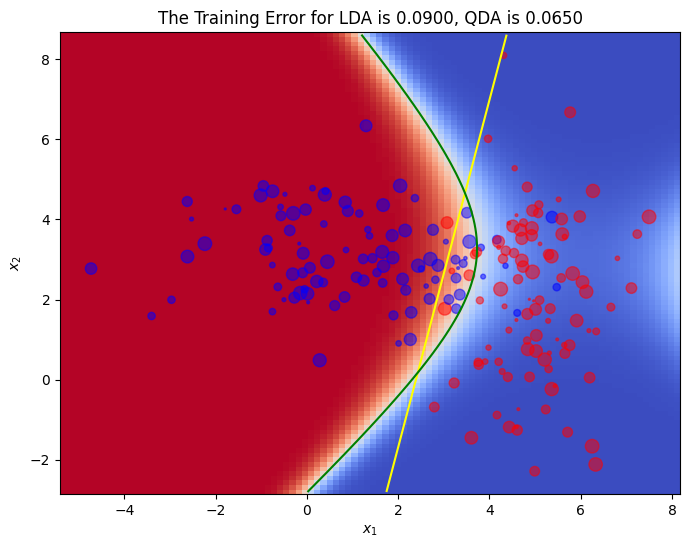

In [17]:
##########11/30上課練習#############

# --------------------------------------------------------------
##繪製散布圖
X = D[:, 0:2]
y = D[:,2]
fig, ax = plt.subplots(figsize=(8, 6))
#切割圖片區域
area = 2 * np.random.randint(50, size = D[:, 0].size) #產生<50的整數，大小為D 的size的大小

#散布圖顏色
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
#繪製散布圖
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = "o" )

########資料評比###########
#兩變量共變異數相同以及共變異數不相同的情況進行比較#
#資料來自excel:用pandas
# ------------------------------------------
###LDA training###
X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
#K = Lda.intercept_ ##利用K, L來畫直線
#L = Lda.coef_
trainErrLDA = 1 - Lda.score(X, y)
#print(Lda.get_params())
#print(dir(Lda)) 
#print(Lda.decision_function(X))
print("Training error for LDA = {:.4f}".format(trainErrLDA))

# ----------------------------------------------------------
###畫圖看結果
nx, ny = 100, 100 ##切割x,y平面，各自切100個間隔
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_) #產生xx,yy的矩陣，即每一個棋盤的交錯點的x座標與y座標

#計算後驗機率值
#Z:(10000, 2)
#顯示屬於群組0,1各自的機率值
Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])#將矩陣拉成一整條以進行broadcasting(拉成一條才能進行運算，矩陣不能運行)
#ravel或者是reshape都可以

#取第一欄(屬於群組0的機率)，並重新組成矩陣
Z = Z[:, 1].reshape(xx.shape)#後驗機率

# ------------------------------------------------------------
#定義自己的色系
cdit = {"red": [(0, 1, 1), (1, 0.7, 0.7)],
"green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
"blue": [(0, 0.7, 0.7), (1, 1, 1)]}

cmap = colors.LinearSegmentedColormap("coolwarm", cdit)
#plt.cm.register_cmap(cmap = cmap)


#畫地板的分界線
plt.pcolormesh(xx, yy, Z, cmap = "coolwarm",\
   norm = colors.Normalize(0., 1.),\
   shading = "auto", zorder = 0)

##畫出屬於群組0的機率為0.5的線
#利用等高線圖進行繪製
contoursLDA = plt.contour(xx, yy, Z, [0.5], colors = "yellow")
##可以嘗試畫立體圖

# --------------------------------------------------------------------------------
###QDA training###
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
#store_covariance:是否存下covariance的估計
Qda.fit(X, y)
trainErrQDA = 1 - Qda.score(X, y)
print("Training error for QDA = {:.4f}".format(trainErrQDA))
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)#後驗機率
plt.pcolormesh(xx, yy, Z, cmap = "coolwarm", norm = colors.Normalize(0., 1.), shading = "auto", zorder = 0)

contoursQDA = plt.contour(xx, yy, Z, [0.5], colors = "green")
plt.title("The Training Error for LDA is {:.4f}, QDA is {:.4f}".format(trainErrLDA, trainErrQDA))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.savefig(img_dir+"qdalda.eps", format="eps")
plt.show()


Training error for LDA = 0.0900


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


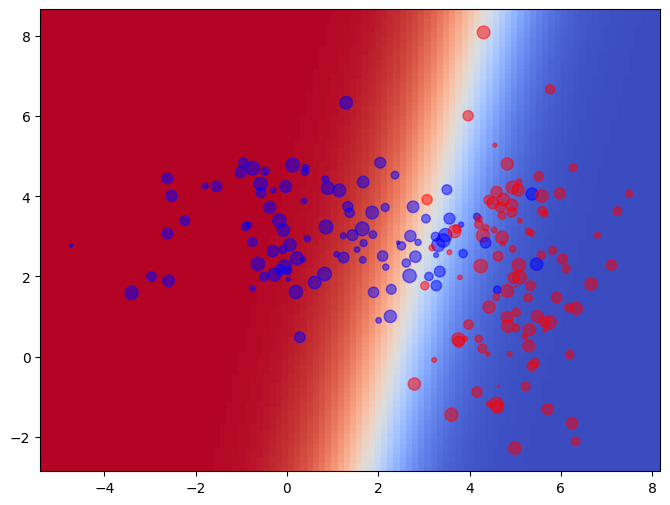

In [43]:
X = D[:, 0:2]
y = D[:,2]
fig, ax = plt.subplots(figsize=(8, 6))
#切割圖片區域
area = 2 * np.random.randint(50, size = D[:, 0].size) #產生<50的整數，大小為D 的size的大小

#散布圖顏色
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
#繪製散布圖
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = "o" )


X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
#K = Lda.intercept_ ##利用K, L來畫直線
#L = Lda.coef_
trainErrLDA = 1 - Lda.score(X, y)
#print(Lda.get_params())
#print(dir(Lda)) 
#print(Lda.decision_function(X))
print("Training error for LDA = {:.4f}".format(trainErrLDA))

# ----------------------------------------------------------
###畫圖看結果
nx, ny = 100, 100 ##切割x,y平面，各自切100個間隔
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_) #產生xx,yy的矩陣，即每一個棋盤的交錯點的x座標與y座標

Z = Lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])#將矩陣拉成一整條以進行broadcasting(拉成一條才能進行運算，矩陣不能運行)
#ravel或者是reshape都可以

#取第一欄(屬於群組0的機率)，並重新組成矩陣
Z = Z[:, 1].reshape(xx.shape)#後驗機率

# ------------------------------------------------------------
#定義自己的色系
cdit = {"red": [(0, 1, 0.3), (1, 0.7, 0.7)],
"green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
"blue": [(0, 0.7, 0.7), (1, 1, 1)]}

cmap = colors.LinearSegmentedColormap("coolwarm", cdit)
#plt.cm.register_cmap(cmap = cmap)


#畫地板的分界線
plt.pcolormesh(xx, yy, Z, cmap = "coolwarm",\
   norm = colors.Normalize(0., 1.),\
   shading = "auto", zorder = 0)

plt.savefig(img_dir+"classmethod2.eps", format="eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


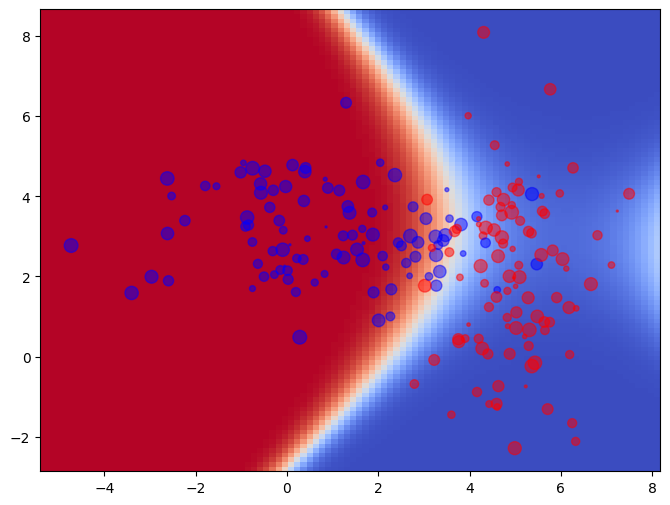

In [45]:
X = D[:, 0:2]
y = D[:,2]
fig, ax = plt.subplots(figsize=(8, 6))
#切割圖片區域
area = 2 * np.random.randint(50, size = D[:, 0].size) #產生<50的整數，大小為D 的size的大小

#散布圖顏色
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
#繪製散布圖
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, alpha = 0.5, marker = "o" )

# ------------------------------------------

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
#store_covariance:是否存下covariance的估計
Qda.fit(X, y)

nx, ny = 100, 100 ##切割x,y平面，各自切100個間隔
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_) #產生xx,yy的矩陣，即每一個棋盤的交錯點的x座標與y座標

cdit = {"red": [(0, 1, 1), (1, 0.7, 0.7)],
"green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
"blue": [(0, 0.7, 0.7), (1, 1, 1)]}

cmap = colors.LinearSegmentedColormap("coolwarm", cdit)

Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)#後驗機率
plt.pcolormesh(xx, yy, Z, cmap = "coolwarm", norm = colors.Normalize(0., 1.), shading = "auto", zorder = 0)

plt.savefig(img_dir+"classmethod3.eps", format="eps")


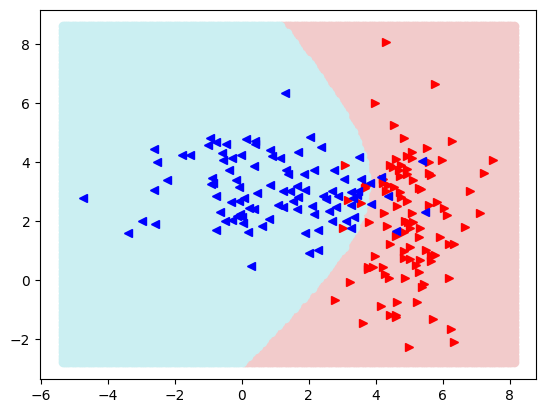

In [46]:
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
plt.plot(C1[:,0], C1[:,1], "r>", label = "Group A")
plt.plot(C2[:,0], C2[:,1],"b<", label = "Group B")

# ------------------------------------------
###LDA training###
Qda = QuadraticDiscriminantAnalysis(tol = 1e-6)
Qda.fit(X, y)
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
x1, x2 = xx.ravel(), yy.ravel()
zz = Qda.predict(np.c_[x1, x2])

# colors = [’r’, ’b’]
colors =["#F2CBCB", "#CBEFF2"]
for i in range(2) :
  plt.scatter(x1[zz==i], x2[zz==i], marker="o", color=colors[i])

plt.savefig(img_dir+"pltmethod.eps", format="eps")

In [7]:
from sklearn.model_selection import train_test_split

data = X = D[:,0:2]
label = y = D[:, 2]
#train_data , test_data , train_label , test_label = train_test_split(data, label, test_size=0.2)

K =100 #模擬次數
LDAtrainingError = np.zeros(K) #用來存取訓練誤差
LDAtestingError = np.zeros(K) #存取測試誤差
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
for i in range(K) :
    # split data into TRAINing and TESTing parts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    Lda.fit(X_train, y_train)
    Lda.predict(X_test)
    LDAtrainingError[i] = 1 - Lda.score(X_train, y_train)
    LDAtestingError[i] = 1 - Lda.score(X_test, y_test)


#print出bootstrapping抽取K次的訓練誤差平均值
print("LDA training Error:{:.4f}".format(LDAtrainingError.mean()))#除了平均數也可以看看變異數
print("LDA testing Error:{:.4f}".format(LDAtestingError.mean()))
##抽取100次:0.0911/0.0995  #跑平均跑了幾次的結果
##抽取1000次:0.0917/0.0971
##抽取10000次:0.092/0.0959

##可以畫出預測誤差的折線圖


LDA training Error:0.0924
LDA testing Error:0.0925


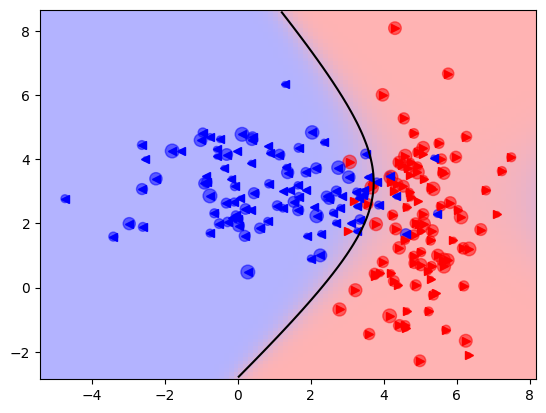

In [8]:
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
plt.plot(C1[:,0], C1[:,1], "r>", label = "Group_A")
plt.plot(C2[:,0], C2[:,1],"b<", label = "Group_B")
# --------------------------------------------------------------------
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)

Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, \
store_covariance = True)
Qda.fit(X, y)
MissClassRateLDA = 1 - Qda.score(X, y)
# --------------------------------------------------------------------
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = "o" )
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)

# --------------------------------------------------------------
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)

#計算後驗機率值
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)#後驗機率
# Define pseudo colors
cdit = {"red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)]}

cmap = colors.LinearSegmentedColormap("red_blue_classes", cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(xx, yy, Z, cmap = "red_blue_classes",\
   norm = colors.Normalize(0., 1.),\
   shading = "auto", zorder = 0)

contoursQDA = plt.contour(xx, yy, Z, [0.5],colors = "k")

ValueError: A colormap named "red_blue_classes" is already registered.

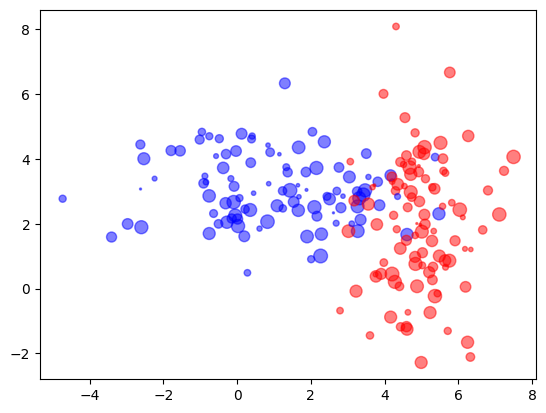

In [9]:
X = D[:, 0:2]
y = D[:,2]
area = 2 * np.random.randint(50, size = D[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(D[:, 0], D[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = "o" )
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
# Define pseudo colors
cdit = {"red": [(0, 1, 1), (1, 0.7, 0.7)],
"green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
"blue": [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = colors.LinearSegmentedColormap(
"red_blue_classes", cdit)
plt.cm.register_cmap(cmap = cmap)


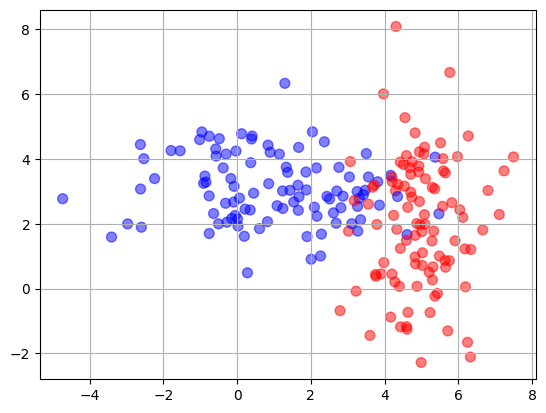

In [10]:
area = 2 * np.random.randint(50, size = D[:, 0].size)
area = 50 + D[:, 2]
colors = ["red" if i == 0 else "blue" for i in D[:, 2]]
plt.scatter(D[:, 0 ], D[:, 1], c=colors, s=area, alpha=0.5)
plt.grid(True)

X = D[:, 0:2]
y = D[:,2]
Lda = LinearDiscriminantAnalysis(tol = 1e-6) 
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)


C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_9380\29237151.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


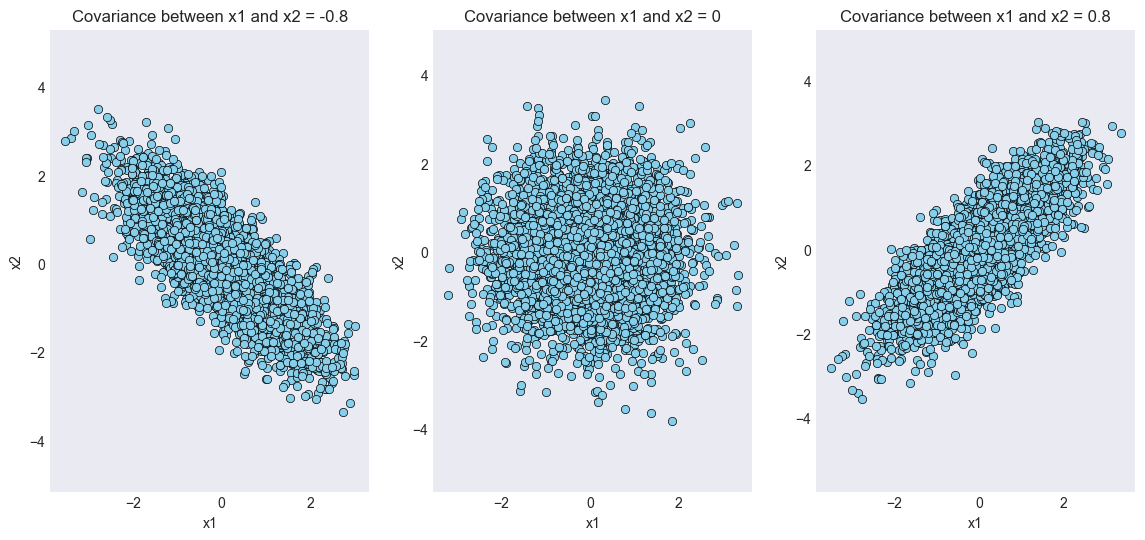

In [17]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
# 利用三種共變異數矩陣來觀察多變量常態分配
 
# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])
 
# Iterating over different covariance
# values
for idx, val in enumerate(cov_val):
    plt.subplot(1, 3, idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 5000)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o', c='skyblue',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')

#plt.savefig(img_dir+"2dim-gaussian.eps", format="eps")
plt.show()

In [ ]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
# 利用三種共變異數矩陣來觀察多變量常態分配
 
# Setting mean of the distributino to
# be at (0,0)
mean = np.array([0,0])
 
for idx, val in enumerate(cov_val):
    plt.subplot(1, 3, idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 5000)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o', c='skyblue',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')

C:\Users\adfghkfr\AppData\Local\Temp\ipykernel_15972\2712963903.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


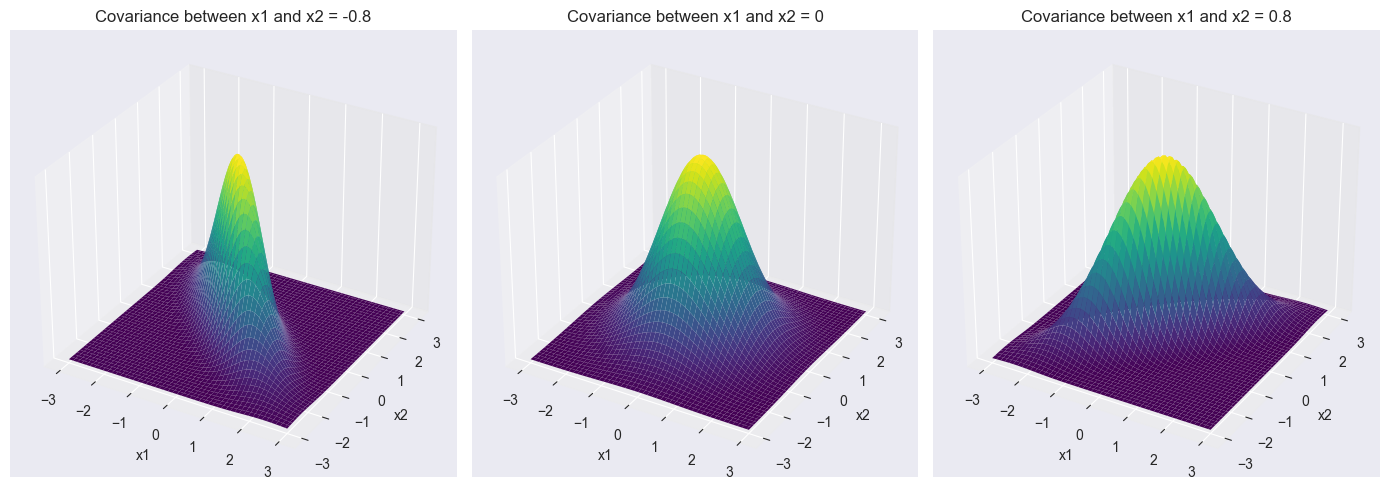

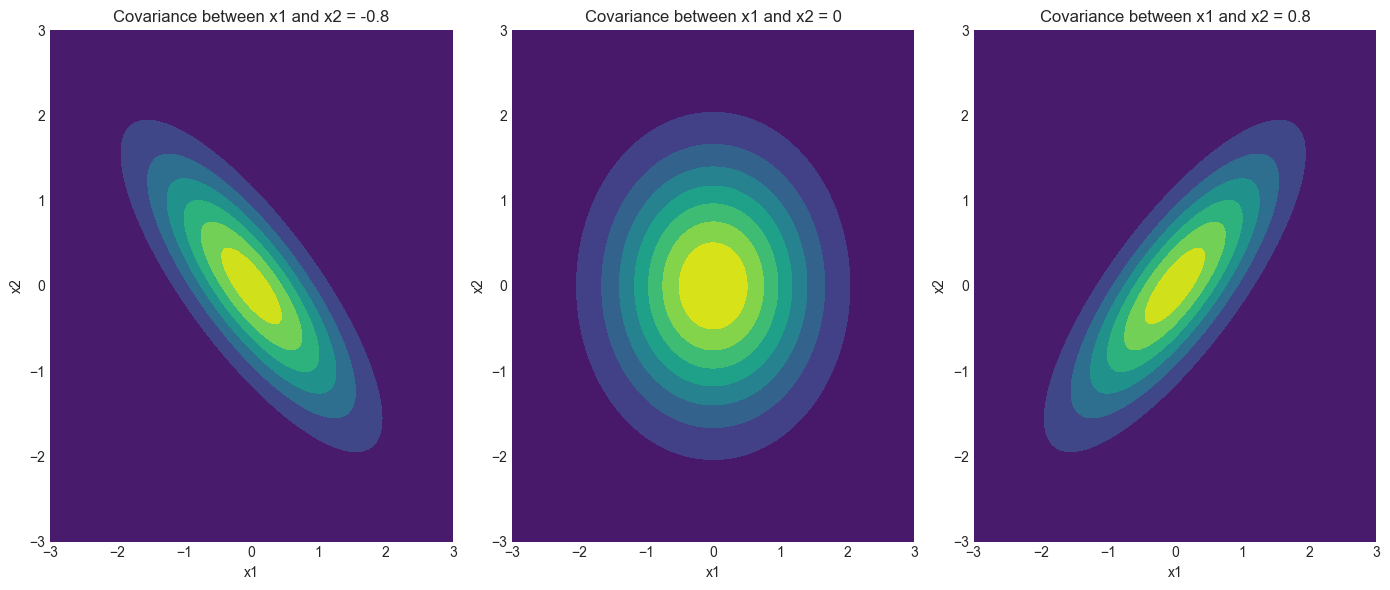

In [47]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14, 6
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])


plt.tight_layout()
#plt.savefig(img_dir+"3dim-gaussian.eps", format="eps")
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
#plt.savefig(img_dir+"example.eps", format="eps")
plt.show()